# Homework # 5

1. Взять датасет из домашнего задания №2. Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.

In [70]:
import pandas as pd
from functools import reduce
import scipy.stats as stats
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import Bounds
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [8]:
#Load data

df_1 = pd.read_csv('users.csv')
df_2 = pd.read_csv('subscribers.csv')
df_3 = pd.read_csv('marketing_campaign.csv')

df_1.head()

,user_id,age_group,language_preferred
0,a1000,0-18 years,English
1,a1001,19-24 years,English
2,a1002,24-30 years,English
3,a1003,30-36 years,English
4,a1004,36-45 years,English


In [7]:
df_2.head()

,user_id,subscribing_channel,date_subscribed,date_canceled,is_retained
0,a1000,House Ads,1/1/18,NaN,True
1,a1001,House Ads,1/1/18,NaN,True
2,a1002,House Ads,1/1/18,NaN,True
3,a1003,House Ads,1/1/18,NaN,True
4,a1004,House Ads,1/1/18,NaN,True


In [12]:
#merge datasets

data = [df_1, df_2, df_3]

df = reduce(lambda left, right: pd.merge(left, right, how = 'outer', on='user_id'), data)

df.head()

,user_id,age_group,language_preferred,subscribing_channel,date_subscribed,date_canceled,is_retained,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,0-18 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
1,a1001,19-24 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
2,a1002,24-30 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
3,a1003,30-36 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True
4,a1004,36-45 years,English,House Ads,1/1/18,NaN,True,1/1/18,House Ads,personalization,English,True


In [13]:
df['variant'].value_counts()

control            5091
personalization    4946
Name: variant, dtype: int64

In [17]:
df['converted'].value_counts()

False    8946
True     1076
Name: converted, dtype: int64

In [45]:
converted = df.groupby('variant')['converted'].sum()
converted.reset_index().unstack()
con = pd.DataFrame(converted)
con['all_converted'] = df['converted'].count()
con

,converted,all_converted
variant,,
control,371,10022
personalization,705,10022


In [46]:
con['no_converted'] = con['all_converted'] - con['converted']
con = con.drop(['all_converted'], axis = 1)
con

,converted,no_converted
variant,,
control,371,9651
personalization,705,9317


In [47]:
result = stats.chi2_contingency(con, correction=False)
chisq, pvalue = result[:2]
print(f'chisq = {chisq}, pvalue = {pvalue}')

chisq = 109.55785364981757, pvalue = 1.2247719241101781e-25


Конверсия в выборке personalization значительно больше и это различие статистически значимо, так как pvalue = 122%

### 2. Цех может производить стулья и столы. На производство стула идет 5 единиц материала, на производство стола - 20 единиц (футов красного дерева). Стул требует 10 человеко-часов, стол - 15. Имеется 400 единиц материала и 450 человеко-часов. Прибыль при производстве стула - 45 долларов США, при производстве стола - 80 долларов США. Сколько надо сделать стульев и столов, чтобы получить максимальную прибыль?

In [48]:
def value(x):
    return - 45*x[0] - 80*x[1]

In [49]:
neq_cons = {
    'type': 'ineq',  # неравенство
    'fun': lambda x: np.array([
        450 - 10 * x[0] - 15 * x[1],
        400 - 5 * x[0] - 20 * x[1],
    ])
}

In [54]:

bounds = Bounds([0, 0], [np.inf, np.inf])

In [60]:

x0 = np.array([10, 10])  # количество продукции, от которой отталкиваемся
res = minimize(value, x0, constraints=neq_cons, bounds=bounds)
print(f'Количество\n стульев - {res.x[0]},\n столов - {res.x[1]}')

Количество
 стульев - 23.99999999999539,
 столов - 13.999999999984908


In [64]:
print('стулья и столы времени:', 10 * 24, 15 * 14 , 'чел. * час')
print('стулья и столы материалы:', 24 * 5, 14 * 20, 'футов дерева')
print('максимизированная прибыль составит:', -1 * value([24, 14]), 'долларов./месяц')

стулья и столы времени: 240 210 чел. * час
стулья и столы материалы: 120 280 футов дерева
максимизированная прибыль составит: 2080 долларов./месяц


### Средний накопленный доход на пользователя с сайта (cumulative ARPU) составил: 
- day1 - 0.4$,

- day3 - 0.6$,

- day7 - 0.8$, 

- day14 - 1.10$, 

- day21 - 1.30$, 

- day30 - 1.40$. 

Подберите аппроксимирующую кривую и сделайте прогноз, сколько в среднем принесет денег пользователь на 90й день. Обоснуйте выбор одной из аппроксимирующей кривой вида: y = a*b^x или y = a*ln(x) + b. 
Формат - ссылка на ноутбук Colab. 


In [67]:
df = pd.DataFrame({
    'day': [1, 3, 7, 14, 21, 30],
    'cumulative ARPU': [0.4, 0.6, 0.8, 1.1, 1.3, 1.4]
})
df.head()

,day,cumulative ARPU
0,1,0.4
1,3,0.6
2,7,0.8
3,14,1.1
4,21,1.3


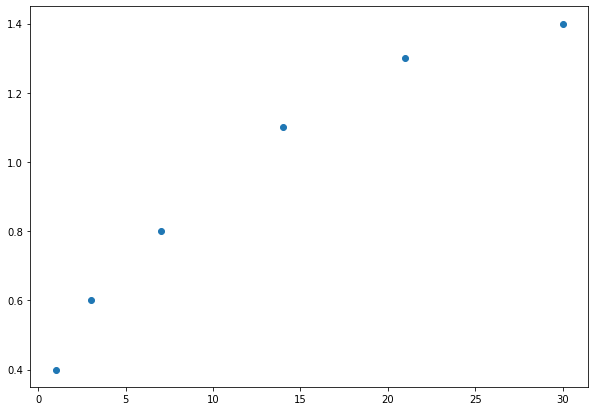

In [69]:
plt.figure(figsize = (10, 7))
plt.scatter(df['day'], df['cumulative ARPU'], label = 'fact data')

In [71]:
def log_func(x, a, b, c):
    return -a * np.log2(b + x) + c

In [72]:
def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [74]:
log_opt, _ = curve_fit(log_func, df['day'], df['cumulative ARPU'])

In [76]:
exp_opt, _ = curve_fit(exp_func, df['day'], df['cumulative ARPU'])

In [77]:
projection_endpoint = 45

In [78]:
log_y_projected = log_func(np.arange(projection_endpoint), *log_opt)
exp_y_projected = exp_func(np.arange(projection_endpoint), *exp_opt)

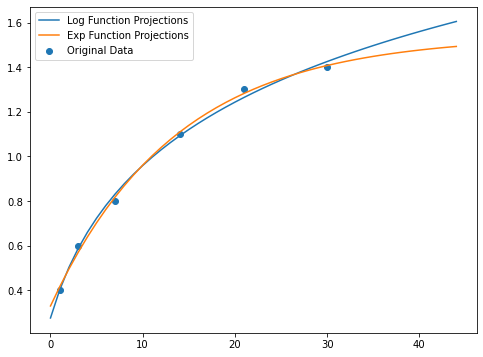

In [79]:
plt.figure(num=None, figsize=(8, 6))
plt.scatter(df['day'], df['cumulative ARPU'], label="Original Data")
plt.plot(log_y_projected, label="Log Function Projections")
plt.plot(exp_y_projected, label="Exp Function Projections")
plt.legend()
plt.show()

In [80]:
print('Прогноз кол-ва пользователей через 45 дней по log модели', round(log_y_projected[44], 0))
print('Прогноз кол-ва пользователей через 45 дней по exp модели', round(exp_y_projected[44], 0))

Прогноз кол-ва пользователей через 45 дней по log модели 2.0
Прогноз кол-ва пользователей через 45 дней по exp модели 1.0


In [81]:
y_log_pred = [log_y_projected[i] for i in df['day']]
y_log_pred

[0.40124030788520265,
 0.5868265922309144,
 0.8306563452037643,
 1.0918230784760043,
 1.2643750867065862,
 1.4250785895188456]

In [82]:
y_exp_pred = [exp_y_projected[i] for i in df['day']]
y_exp_pred

[0.41526445627323283,
 0.569406524240757,
 0.8172068469171472,
 1.1084953047536283,
 1.2823787720935025,
 1.4072480956283182]

In [84]:
((df['cumulative ARPU'] - y_log_pred) ** 2).mean()

0.0005133034470301098

In [85]:
((df['cumulative ARPU'] - y_exp_pred) ** 2).mean()

0.00031670878853432574

Экспоненциальная функция предсказывает лучше